In [2]:

## To load the dataset
import pandas as pd
import matplotlib.pyplot as plt
#seaborn: for data visualization and exploratory data analysis
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")






In [3]:
#Read data in csv file store into dataframe
df = pd.read_csv('Admission_Predict.csv')
print(df.head(5))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
#To drop the irrelevant column and check if there are any null values in the dataset
df = df.drop(['Serial No.'], axis=1)
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


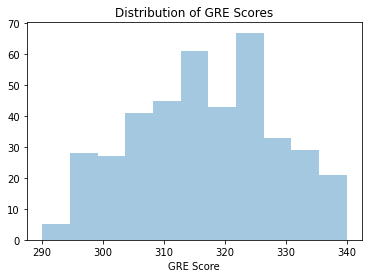

In [5]:
#To see the distribution of the variables of graduate applicants.
#distplot() plot distributed data as observations
#KDE: Kerner Density Estimate, probability density function of a continuous random variable Show GRE Score
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

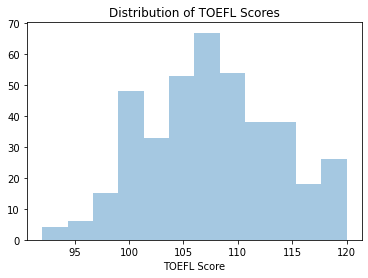

In [20]:
#Show TOEFL Score
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()









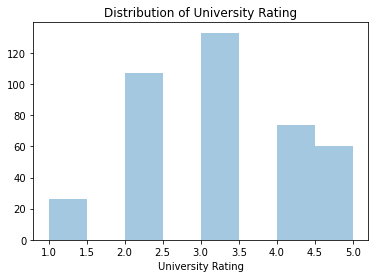

In [21]:
#Show University Ratings
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

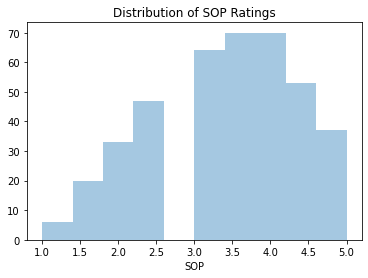

In [22]:
#Show SOP Ratings
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

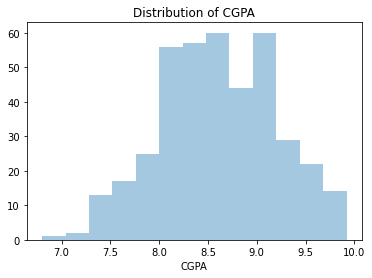

In [23]:
#Show CGPA
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

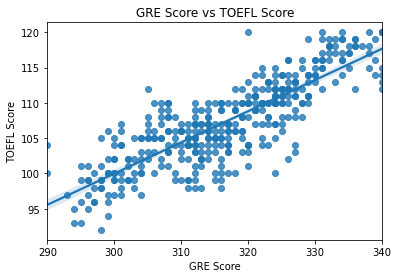

In [24]:
#It is clear from the distributions, students with varied merit apply for the university.
##########################################################################
#Understanding the relation between different factors responsible for graduate admissions GRE Score vs TOEFL Score
#regplot() :Plot data and a linear regression model fit.
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

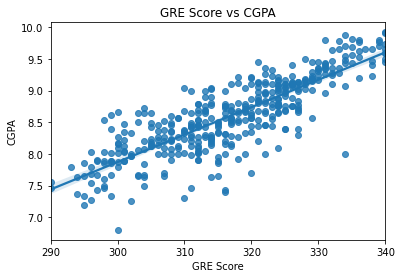

In [25]:
#People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable
#GRE Score vs CGPA
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

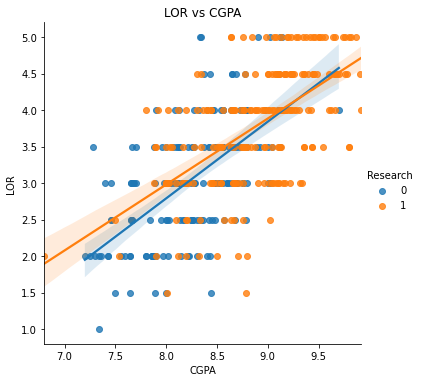

In [26]:
#Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working
#LOR vs CGPA show wheather Research 0 or 1
#lmplot():a 2D scatterplot with an optional overlaid regression line.
#hue: Variables that define subsets of the data, which will be drawn on separate facets in the grid.
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

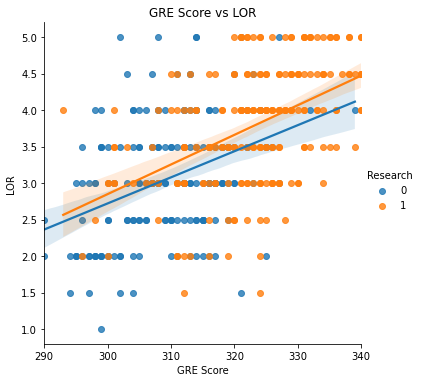

In [27]:
#LORs (Letter of Recommendation strength) are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence.
#Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs
#GRE Score vs LOR SHOW WHEATHER Research 0 or 1
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

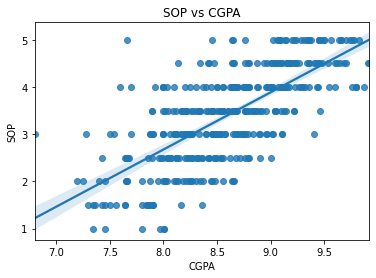

In [28]:
#GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores
#SOP vs CGPA
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()

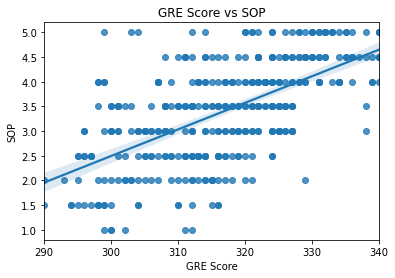

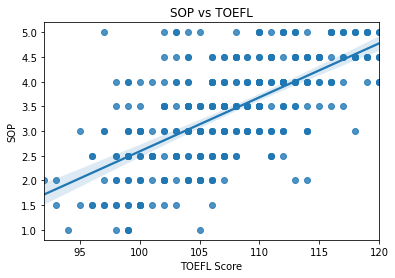

In [29]:

#CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs
#GRE Score vs SOP
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()
#Similary, GRE Score and CGPA is only slightly related
#SOP vs TOEFL
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("SOP vs TOEFL")
plt.show()

In [30]:
#Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.
##########################################################################
#Correlation among variables
import numpy as np
#corr():Find the pairwise correlation of all columns in the dataframe
corr = df.corr()
print(corr)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

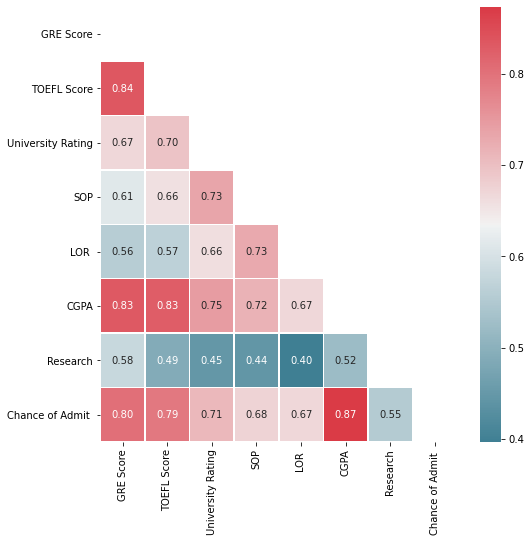

In [31]:
#plt.subplot:Crate a figure & set sub plots
fig, ax = plt.subplots(figsize=(8, 8))
#Make a diverging palette between two HUSL colors.
#cmap: colour map set
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#zeros_like():Returns an array of given shape and type as given array, with zeros.
dropSelf = np.zeros_like(corr)
#np.triu_indices_from(dropSelf): Return indices of array
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [32]:
#Lets split the dataset with training and testing set and prepare the
#inputs and outputs
from sklearn.model_selection import train_test_split
#drop col chances of admission
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
#split data for training & tasting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [33]:
#Lets use a bunch of different algorithms to see which model performs better from sklearn.metrics import accuracy_score
#DecisionTree, Random Forest, K Neighbor, SVR, Linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
#These methods predict the future applicant's chances of admission.
models = [['DecisionTree :',DecisionTreeRegressor()],
['Linear Regression :', LinearRegression()],
['SVM :', SVR()]]
print("Results...")

Results...


In [35]:

#For loop for generating model results
for name,model in models:
    
    
    model = model
#Fit training data of x & y axis
model.fit(X_train, y_train)
#Pass predicted or test result
predictions = model.predict(X_test)

In [36]:
#Difference between actual value & predicted value
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

SVM : 0.08180727044650482


In [37]:
#Something as simple as Linear Regression performs the best in this case, which proves that complicated models doesnt always mean better results. There are situations when simple models are much better suited
##########################################################################
#Generate Feature Importances
classifier = RandomForestRegressor()
classifier.fit(X,y)

RandomForestRegressor()

In [38]:
#X.columns features in dataset
feature_names = X.columns
print(feature_names)
#Initialize importance_frame[] in 2 dim array.
importance_frame = pd.DataFrame()
#Two Dimensional Array Format column names
importance_frame['Features'] = X.columns
#classifier.feature_importance is decision tree based on correlation value As per importance of admission
importance_frame['Importance'] = classifier.feature_importances_
#Sort the features by high to low bar graph
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)
##########################################################################

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


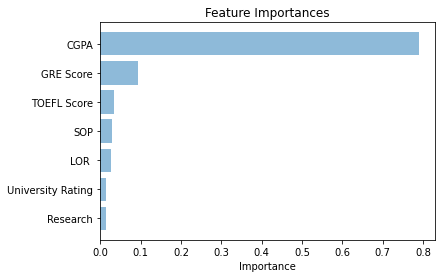

In [39]:

#Visualize 7 Feature Importances
#bar: plots horizontal rectangles with constant heights.
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
#yticks: set feature lable on y axis
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
#Clearly, CGPA is the most factor for graduate admissions followed by GRE Score.
plt.title('Feature Importances')
plt.show()
